# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [10]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [12]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [13]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- French Programmer Sent Bitcoin Donations to Far-Right Activists Who Participated in the US Capitol Riots.  A crypto forensic analysis reveals that a French donor sent over $500,000 worth of bitcoin (BTC) to far-right activists in the United States. The half-million dollars went to the groups that took part in the pro-Trump riots in the U.S. Capitol. Alt-Right Personalities and Websites Are Included on the List of Recipients According to Chainalysis, [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/french-programmer-sent-bitcoin-donations-to-far-right-activists-us-capitol-riots/) 

In [14]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Covid: UK variant could drive 'rapid growth' in US cases, CDC warns.  Health officials warn the highly contagious UK Covid variant could become the dominant strain by March. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-us-canada-55684878) 

### Kainų kaita pandemijos metu

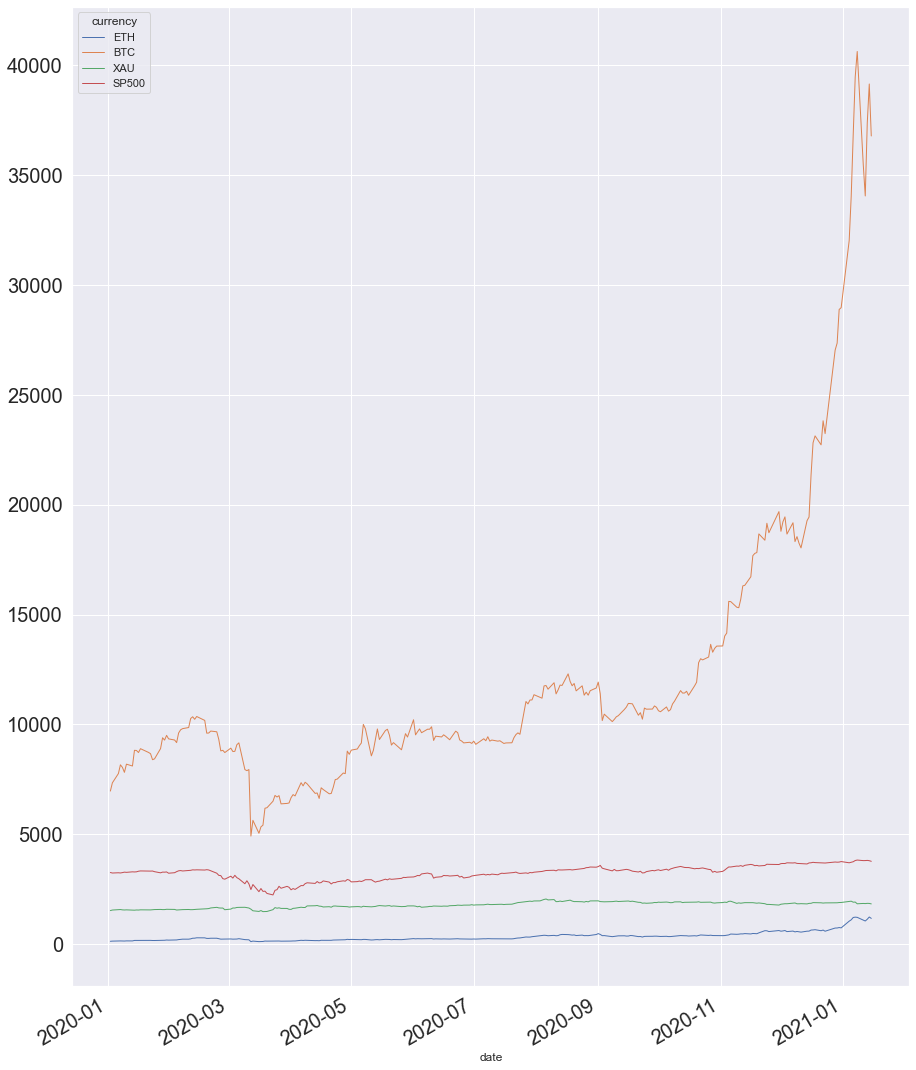

In [15]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [16]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.974381,0.564514,0.747982
BTC,0.974381,1.000000,0.432818,0.715593
XAU,0.564514,0.432818,1.000000,0.582168
SP500,0.747982,0.715593,0.582168,1.000000


In [17]:
#hide ### Koreliacijos matrica.

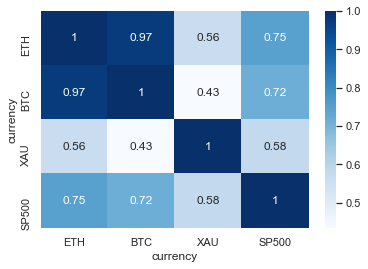

In [18]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')